In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
dataset = pd.read_parquet('../data/clean/50_Startups.parquet')

In [3]:
dataset.columns

Index(['RND', 'ADMIN', 'MRK_S', 'STATE', 'PROFIT'], dtype='object')

In [4]:
target = ['PROFIT']
numerical_features = ['RND', 'ADMIN', 'MRK_S']
categorical_features = ['STATE']

In [5]:
X = dataset.drop(columns=target, axis=1)
y = dataset[target]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_pipeline, categorical_features),
        ('numerical', numerical_pipeline, numerical_features)
    ],
    remainder='passthrough'
)

final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('Linear_Regression', LinearRegression())
])

In [8]:
final_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('Linear_Regression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('categorical', ...), ('numerical', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [9]:
y_pred = final_pipeline.predict(X_test)
np.set_printoptions(precision=2)

y_test = y_test.to_numpy()
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


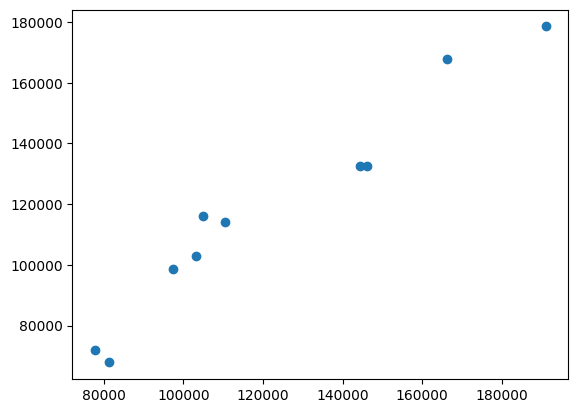

In [10]:
plt.scatter(y_test, y_pred)

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

MAE:  7514.29
MSE:  83502864.03
RMSE: 9137.99
R²:   0.9347
